# Solving the river pollution problem using NIMBUS

Welcome to this notebook demonstrating the DESDEO interactive multi-objective optimisation framework.

In this notebook we will consider a toy problem dealing with water quality management, and the pollution produced by a fishery. We want to maximise the water quality as measured in two locations: the fishery and a downstream city (the measurements are based on dissolved oxygen concentration). Additionally, we want to maximise the ROI (Return On Investment) of the fishery. Simultaneously we want to minimise the additional tax which residents of the city must pay.

To run this example, you need to run each individual code block (the ones saying `In [ ]:` to their left) by clicking on each one and then clicking "Run". Please refer to the [background section of the documentation](http://desdeo.readthedocs.io/en/latest/background/index.html) for information about NIMBUS.

## Imports

This first code snippet simply imports the parts of DESDEO we need for this notebook. We import optimisation methods and desdeo the RiverPollution problem definition from the desdeo module, and visualisation and preference selection tools and widgets from the desdeo_vis module. Finally, we import and initialise altair which is needed for drawing plots.

In [1]:
from desdeo.method.NIMBUS import NIMBUS
from desdeo.optimization import SciPyDE
from desdeo.problem.toy import RiverPollution

from desdeo_vis.plot import parplot
from desdeo_vis.widget import NimbusPrefWidget

import altair.vega.v3 as vg
vg.renderers.enable('notebook');

## Initial iteration and preference selection

First we initialise the RiverPollution problem and the NIMBUS solution method. Then we get an initial result. We can plot solutions at any time using `parplot`. 

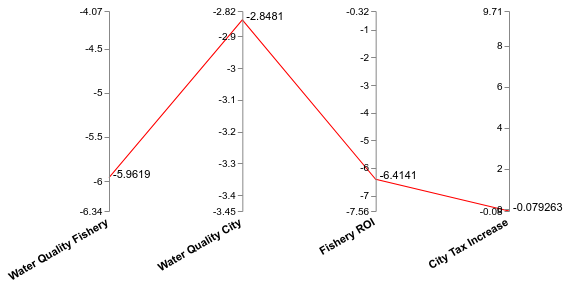

In [2]:
problem = RiverPollution()
method = NIMBUS(problem, SciPyDE)
results = method.init_iteration()

parplot(results.objective_vars, problem)

Next, we will give our first preference based on NIMBUS. We construct a `NimbusPrefWidget`, save it to a variable and display it. You can now specify your preferences using the displayed widget. If you're not sure how to use it, read [the documentation on classification in NIMBUS](http://desdeo.readthedocs.io/en/latest/background/classification-in-nimbus.html).

In [3]:
pref = NimbusPrefWidget(results.objective_vars, problem)
pref

NimbusPrefWidget(spec={'$schema': 'https://vega.github.io/schema/vega/v3.json', 'width': 400, 'height': 200, '…

## Solutions based on preference

We can now generate a new set of results based on this preference. Note that this will raise an `InvalidNimbusPreferencesException` if you run it while the above preferences are invalid.

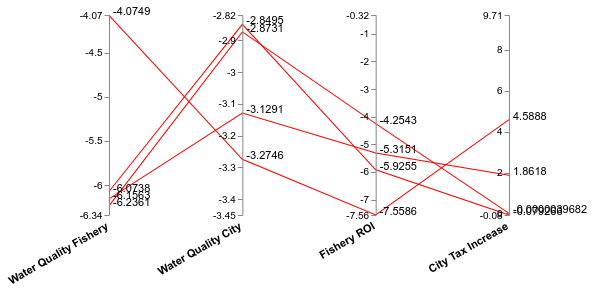

In [4]:
results2_all = method.next_iteration(preference=pref.nimbus_clf(method))

parplot(results2_all.objective_vars, problem)

We might choose to generate less extra solutions...

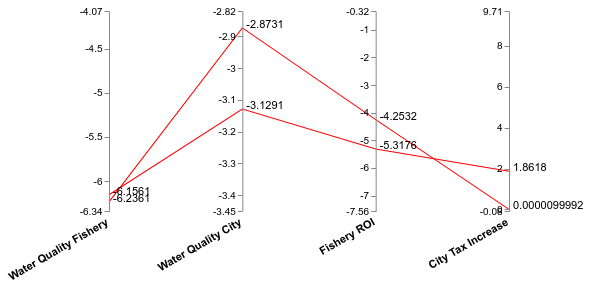

In [5]:
results2_less = method.next_iteration(preference=pref.nimbus_clf(method), num_scalars=2)

parplot(results2_less.objective_vars, problem)

We can also choose a subset of scalarization functions from NIM, ACH, GUESS, STOM. These are the NIMBUS scalarization function and the NIMBUS version of the achievement, guess and satisficing trade-off functions respectively.

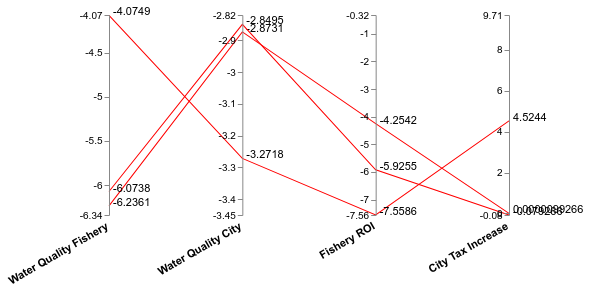

In [6]:
results2_spec = method.next_iteration(preference=pref.nimbus_clf(method), scalars=['NIM', 'GUESS', 'STOM'])

parplot(results2_spec.objective_vars, problem)

## Generating intermediate solutions

If none of these solutions exactly satisfy us, we can generate and view solutions between two solutions we've generated so far. Here we generate 4 solutions between the solutions generated by the NIMBUS and GUESS scalarisation functions.

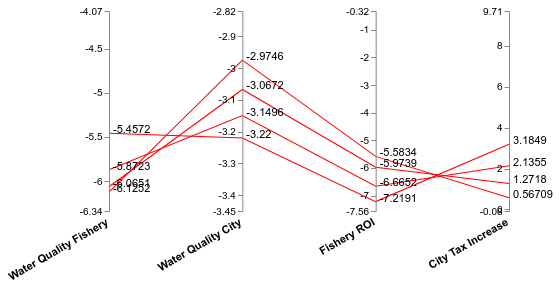

In [7]:
results3 = method.between(results2_spec.objective_vars[0], results2_spec.objective_vars[1], 4)

parplot(results3.objective_vars, problem)